In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 19.9 MB/s eta 0:00:00


In [2]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

In [3]:

temperature = ctrl.Antecedent(np.arange(15, 36, 1), 'temperature')
humidity = ctrl.Antecedent(np.arange(0, 101, 1), 'humidity')
people = ctrl.Antecedent(np.arange(0, 11, 1), 'people')

fan_speed = ctrl.Consequent(np.arange(0, 101, 1), 'fan_speed')
cooling_level = ctrl.Consequent(np.arange(0, 101, 1), 'cooling_level')

In [5]:

temperature['cold'] = fuzz.trimf(temperature.universe, [15, 15, 20])
temperature['cool'] = fuzz.trimf(temperature.universe, [18, 21, 24])
temperature['comfortable'] = fuzz.trimf(temperature.universe, [22, 25, 27])
temperature['warm'] = fuzz.trimf(temperature.universe, [26, 28, 31])
temperature['hot'] = fuzz.trimf(temperature.universe, [29, 35, 35])

humidity['low'] = fuzz.trimf(humidity.universe, [0, 0, 40])
humidity['medium'] = fuzz.trimf(humidity.universe, [30, 50, 70])
humidity['high'] = fuzz.trimf(humidity.universe, [60, 100, 100])


people['few'] = fuzz.trimf(people.universe, [0, 0, 4])
people['moderate'] = fuzz.trimf(people.universe, [3, 5, 7])
people['many'] = fuzz.trimf(people.universe, [6, 10, 10])


fan_speed['low'] = fuzz.trimf(fan_speed.universe, [0, 0, 40])
fan_speed['medium'] = fuzz.trimf(fan_speed.universe, [30, 50, 70])
fan_speed['high'] = fuzz.trimf(fan_speed.universe, [60, 100, 100])


cooling_level['low'] = fuzz.trimf(cooling_level.universe, [0, 0, 40])
cooling_level['medium'] = fuzz.trimf(cooling_level.universe, [30, 50, 70])
cooling_level['high'] = fuzz.trimf(cooling_level.universe, [60, 100, 100])


In [6]:
rule1 = ctrl.Rule(temperature['cold'], fan_speed['low'])
rule2 = ctrl.Rule(temperature['cool'], fan_speed['low'])
rule3 = ctrl.Rule(temperature['comfortable'], fan_speed['medium'])
rule4 = ctrl.Rule(temperature['warm'], fan_speed['high'])
rule5 = ctrl.Rule(temperature['hot'], fan_speed['high'])
rule6 = ctrl.Rule(temperature['cold'], cooling_level['low'])
rule7 = ctrl.Rule(temperature['cool'], cooling_level['low'])
rule8 = ctrl.Rule(temperature['comfortable'], cooling_level['medium'])
rule9 = ctrl.Rule(temperature['warm'], cooling_level['high'])
rule10 = ctrl.Rule(temperature['hot'], cooling_level['high'])
rule11 = ctrl.Rule(humidity['low'], cooling_level['low'])
rule12 = ctrl.Rule(humidity['medium'], cooling_level['medium'])
rule13 = ctrl.Rule(humidity['high'], cooling_level['high'])
rule14 = ctrl.Rule(people['few'], fan_speed['low'])
rule15 = ctrl.Rule(people['moderate'], fan_speed['medium'])
rule16 = ctrl.Rule(people['many'], fan_speed['high'])
rule17 = ctrl.Rule(temperature['hot'] & humidity['high'] & people['many'],
                 (cooling_level['high'], fan_speed['high']))
rule18 = ctrl.Rule(temperature['comfortable'] & humidity['medium'] & people['moderate'],
                 (cooling_level['medium'], fan_speed['medium']))
rule19 = ctrl.Rule(temperature['cool'] & humidity['low'] & people['few'],
                 (cooling_level['low'], fan_speed['low']))

In [7]:
ac_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10,
                            rule11, rule12, rule13, rule14, rule15, rule16, rule17, rule18, rule19])
ac = ctrl.ControlSystemSimulation(ac_ctrl)

In [8]:
ac.input['temperature'] = 30
ac.input['humidity'] = 75
ac.input['people'] = 8

ac.compute()


Tốc độ quạt: 84.4%
Mức độ làm mát: 83.5%


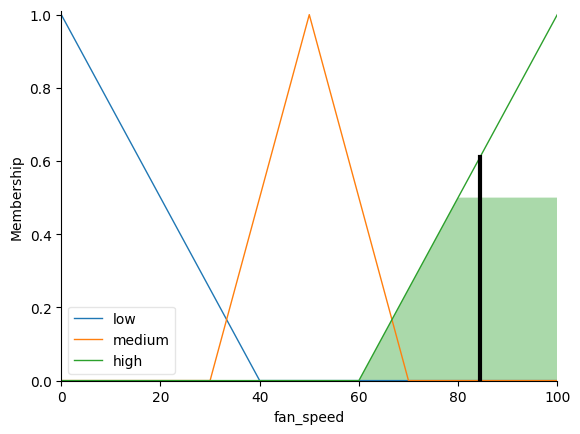

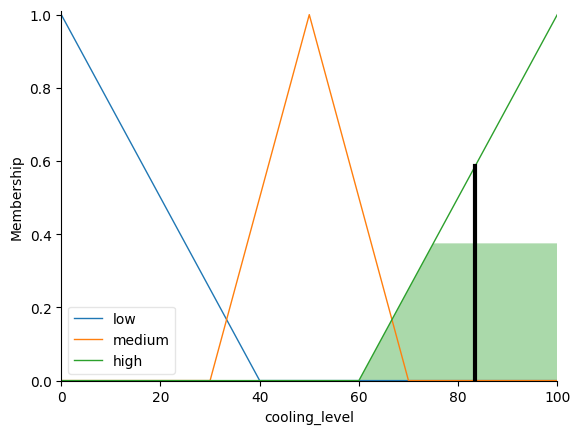

<Figure size 1000x300 with 0 Axes>

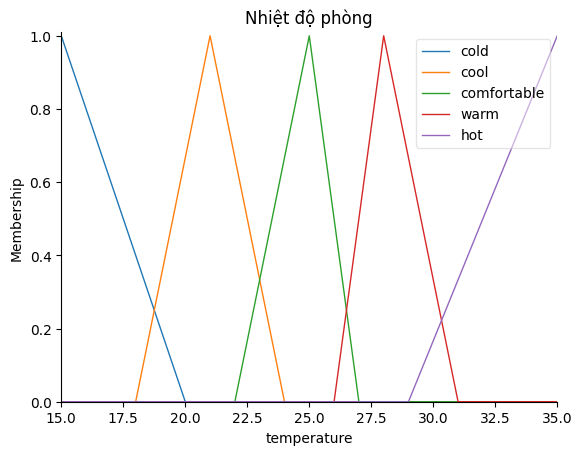

<Figure size 1000x300 with 0 Axes>

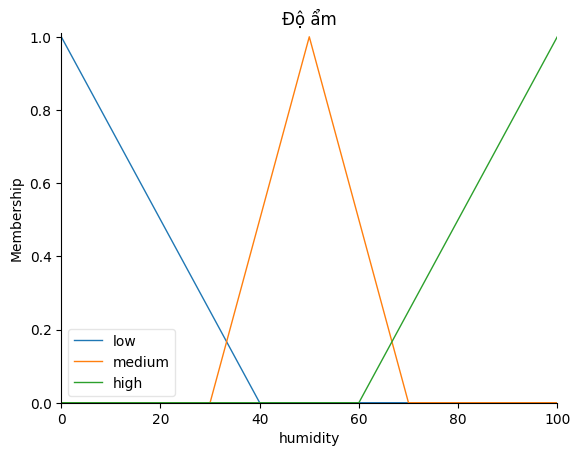

<Figure size 1000x300 with 0 Axes>

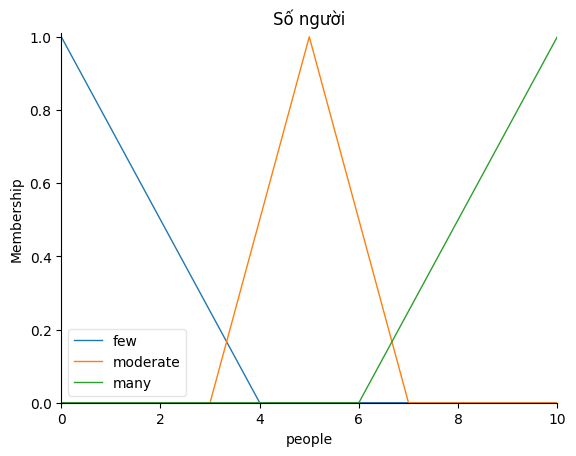

In [9]:

print(f"Tốc độ quạt: {ac.output['fan_speed']:.1f}%")
print(f"Mức độ làm mát: {ac.output['cooling_level']:.1f}%")


fan_speed.view(sim=ac)
cooling_level.view(sim=ac)


plt.figure(figsize=(10, 3))
temperature.view()
plt.title('Nhiệt độ phòng')

plt.figure(figsize=(10, 3))
humidity.view()
plt.title('Độ ẩm')

plt.figure(figsize=(10, 3))
people.view()
plt.title('Số người')

plt.show()